<a href="https://colab.research.google.com/github/allakutkina/eggsplain/blob/main/CLS_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook attention values are re-extracted from bertviz output htmls and htmls are re-written in such way that only cls attentions are displayed. Attentions are extracted from htmls for consistency because the author forgot to save them in a reasonable way :)

In [ ]:
import numpy as np

In [ ]:
import json

In [ ]:
import os
files = []
for file in os.listdir("/content/drive/MyDrive/BertExplained/"):
  if file.endswith("bertviz.html"):
    files.append(file)

In [ ]:
for filepath in files:
  with open(os.path.join("/content/drive/MyDrive/BertExplained/",filepath)):
    print(filepath)

0_1_1_22_bertviz.html
1_1_1_16_bertviz.html
2_1_1_9_bertviz.html
3_1_0_14_bertviz.html
4_1_1_14_bertviz.html
5_0_0_13_bertviz.html
6_0_0_12_bertviz.html
7_1_1_15_bertviz.html
8_1_1_23_bertviz.html
9_1_1_14_bertviz.html
10_1_1_18_bertviz.html
11_1_1_19_bertviz.html
12_0_0_27_bertviz.html
13_1_1_15_bertviz.html
14_0_0_26_bertviz.html
15_0_0_13_bertviz.html
16_1_0_22_bertviz.html
17_1_1_12_bertviz.html
18_1_1_15_bertviz.html
19_0_0_12_bertviz.html
20_0_0_22_bertviz.html
21_0_0_12_bertviz.html
22_1_1_20_bertviz.html
23_0_0_19_bertviz.html
24_0_0_12_bertviz.html
25_1_1_16_bertviz.html
26_0_0_22_bertviz.html
27_0_0_22_bertviz.html
28_1_1_11_bertviz.html
29_0_0_23_bertviz.html
30_1_1_14_bertviz.html
31_0_0_14_bertviz.html
32_0_0_13_bertviz.html
33_0_0_12_bertviz.html
34_0_0_12_bertviz.html
35_0_0_11_bertviz.html
36_0_0_19_bertviz.html
37_0_0_16_bertviz.html
38_0_0_18_bertviz.html
39_1_1_21_bertviz.html
40_1_1_12_bertviz.html
41_1_1_10_bertviz.html
42_1_1_13_bertviz.html
43_0_0_12_bertviz.html

In [ ]:
with open(os.path.join("/content/drive/MyDrive/BertExplained/",files[0])) as f:

    lines = f.readlines()

#find in which part of the file attentions are stored
for i, line in enumerate(lines):
    if "const params = " in line:
      print(i)

33


In [ ]:
#getting at the part of the file where attentions are stored
pieces = lines[33].split(':')
attentions = json.loads(pieces[3].replace(', \"left_text\"',''))
attentions = np.asarray(attentions)
#creating zero attentions array of the same size so we can just re-assign interesting patterns:
zero_attention = np.zeros(attentions.shape, dtype = float)
zero_attention[:, :, 0, :] = attentions[:, :, 0, :]
# magic number 3: that's where attentions are in the split
pieces[3] = json.dumps(zero_attention.tolist()) + ', \"left_text\"'
lines[33] = ':'.join(pieces)

In [ ]:
# looping over all the files to extract cls attentions
for filepath in files:
    with open(os.path.join("/content/drive/MyDrive/BertExplained/",filepath)) as f:
      lines = f.readlines()
    pieces = lines[33].split(':')
    attentions = json.loads(pieces[3].replace(', \"left_text\"',''))
    attentions = np.asarray(attentions)
    zero_attention = np.zeros(attentions.shape, dtype = float)
    zero_attention[:, :, 0, :] = attentions[:, :, 0, :]
    pieces[3] = json.dumps(zero_attention.tolist()) + ', \"left_text\"'
    lines[33] = ':'.join(pieces)
    with open ("/content/drive/MyDrive/BertExplained/BertViz_CLS/"+filepath, 'w') as out:
      for item in lines:
            # write each item on a new line
            out.write("%s\n" % item)
    print(filepath)

0_1_1_22_bertviz.html
1_1_1_16_bertviz.html
2_1_1_9_bertviz.html
3_1_0_14_bertviz.html
4_1_1_14_bertviz.html
5_0_0_13_bertviz.html
6_0_0_12_bertviz.html
7_1_1_15_bertviz.html
8_1_1_23_bertviz.html
9_1_1_14_bertviz.html
10_1_1_18_bertviz.html
11_1_1_19_bertviz.html
12_0_0_27_bertviz.html
13_1_1_15_bertviz.html
14_0_0_26_bertviz.html
15_0_0_13_bertviz.html
16_1_0_22_bertviz.html
17_1_1_12_bertviz.html
18_1_1_15_bertviz.html
19_0_0_12_bertviz.html
20_0_0_22_bertviz.html
21_0_0_12_bertviz.html
22_1_1_20_bertviz.html
23_0_0_19_bertviz.html
24_0_0_12_bertviz.html
25_1_1_16_bertviz.html
26_0_0_22_bertviz.html
27_0_0_22_bertviz.html
28_1_1_11_bertviz.html
29_0_0_23_bertviz.html
30_1_1_14_bertviz.html
31_0_0_14_bertviz.html
32_0_0_13_bertviz.html
33_0_0_12_bertviz.html
34_0_0_12_bertviz.html
35_0_0_11_bertviz.html
36_0_0_19_bertviz.html
37_0_0_16_bertviz.html
38_0_0_18_bertviz.html
39_1_1_21_bertviz.html
40_1_1_12_bertviz.html
41_1_1_10_bertviz.html
42_1_1_13_bertviz.html
43_0_0_12_bertviz.html

In [ ]:
zero_attention = np.zeros(np.asarray(attentions).shape, dtype = float)

In [ ]:
attentions = np.asarray(attentions)

In [ ]:
zero_attention[:, :, 0, :] = attentions[:, :, 0, :]

In [ ]:
zero_attention[0][0]

array([[0.03564663, 0.03618923, 0.03705772, 0.01600062, 0.04768389,
        0.08452203, 0.03613202, 0.05067219, 0.04091505, 0.05710432,
        0.02654863, 0.0360631 , 0.02678079, 0.        , 0.076781  ,
        0.06766302, 0.03460433, 0.04777114, 0.        , 0.03504819,
        0.03709808, 0.214498  ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.       

In [ ]:
pieces[3] = json.dumps(zero_attention.tolist()) + ', \"left_text\"'

In [ ]:
lines[33] = ':'.join(pieces)
lines[33]

'        const params = {"attention": [{"name": null, "attn":[[[[0.03564663231372833, 0.036189232021570206, 0.037057723850011826, 0.016000619158148766, 0.047683894634246826, 0.08452203124761581, 0.03613201528787613, 0.05067218840122223, 0.040915053337812424, 0.05710432305932045, 0.026548627763986588, 0.036063097417354584, 0.026780791580677032, 0.0, 0.0767810046672821, 0.06766302138566971, 0.034604333341121674, 0.047771137207746506, 0.0, 0.03504818677902222, 0.037098076194524765, 0.21449799835681915], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [ ]:
with open ("/content/drive/MyDrive/BertExplained/trying", 'w') as out:
  for item in lines:
        # write each item on a new line
        out.write("%s\n" % item)

In [ ]:
import IPython

IPython.display.HTML("/content/drive/MyDrive/BertExplained/BertViz_CLS/"+files[10])

In [ ]:
#obtaining necessary data from html
all_attentions = []
headers = []
all_words = []
for filepath in files:
    with open(os.path.join("/content/drive/MyDrive/BertExplained/",filepath)) as f:
      lines = f.readlines()
    #retrieving attentions
    pieces = lines[33].split(':')
    attentions = json.loads(pieces[3].replace(', \"left_text\"',''))
    attentions = np.asarray(attentions)
    # retrieving text and labels
    header = ' \n '.join(lines[0].replace('<p>','').split('</p>')[:-2])
    all_attentions.append(attentions)
    headers.append(header)

    words = json.loads(pieces[4].replace(', "right_text"',''))
    all_words.append(words)

In [ ]:
full_sums = []
last_sums = []
for x in all_attentions:
    full_sums.append(max(x[:, :, 0, :].sum(axis=0).sum(axis=0)[1:-1]))
    last_sums.append((x[:, :, 0, :].sum(axis=0)[-1][0]))

max_sum_full = max(full_sums)
max_sum_last = max(last_sums)

In [ ]:
plt.tight_layout()
plt.rcParams["figure.figsize"] = (8,6)

for filepath, header, attentions, words in zip(files, headers, all_attentions, all_words):
    # creating zero attentions array of the same size so we can just re-assign cls attention and zero out everything else:
    zero_attention = np.zeros(attentions.shape, dtype = float)
    zero_attention[:, :, 0, :] = attentions[:, :, 0, :]

    # full attentions sum
    attention_sum = zero_attention.sum(axis=0).sum(axis=0)[0]
    # creating figure
    fig_full = pd.DataFrame(attention_sum, columns=['attention_sum'],index=words)[1:-1].plot(kind = 'bar', ylim = [0, max_sum_full]).get_figure()
    # obtaining labels from the html
    fig_full.suptitle(header)
    fig_full.savefig("/content/drive/MyDrive/BertExplained/Attentions/"+filepath[:-12]+'sum_attentions_full.jpg', bbox_inches="tight")
    plt.close()

    # last layer attention sum
    attention_sum_last_layer = zero_attention.sum(axis=0)[-1][0]
    # creating figure
    fig_last = pd.DataFrame(attention_sum_last_layer, columns=['attention_sum_last_layer'],index=words)[1:-1].plot(kind = 'bar', ylim = (0, max_sum_last)).get_figure()
    #obtaining labels from the html
    fig_last.suptitle(header)
    fig_last.savefig("/content/drive/MyDrive/BertExplained/Attentions/"+filepath[:-12]+'sum_attentions_last.jpg', bbox_inches="tight")
    plt.close()

    # heatmap of heads
    attention_sum_head = zero_attention[:,:,0,1:-1].sum(axis=2)
    # creating figure
    plt.imshow(attention_sum_head, cmap='hot', interpolation='nearest')
    plt.colorbar()
    #obtaining text and label from the html
    plt.title(header)
    plt.ylabel('layers')
    plt.xlabel('heads')
    plt.savefig("/content/drive/MyDrive/BertExplained/Attentions/"+filepath[:-12]+'attention_heads_heatmap.jpg', bbox_inches="tight")
    plt.close()
    print(filepath)

0_1_1_22_bertviz.html
1_1_1_16_bertviz.html
2_1_1_9_bertviz.html
3_1_0_14_bertviz.html
4_1_1_14_bertviz.html
5_0_0_13_bertviz.html
6_0_0_12_bertviz.html
7_1_1_15_bertviz.html
8_1_1_23_bertviz.html
9_1_1_14_bertviz.html
10_1_1_18_bertviz.html
11_1_1_19_bertviz.html
12_0_0_27_bertviz.html
13_1_1_15_bertviz.html
14_0_0_26_bertviz.html
15_0_0_13_bertviz.html
16_1_0_22_bertviz.html
17_1_1_12_bertviz.html
18_1_1_15_bertviz.html
19_0_0_12_bertviz.html
20_0_0_22_bertviz.html
21_0_0_12_bertviz.html
22_1_1_20_bertviz.html
23_0_0_19_bertviz.html
24_0_0_12_bertviz.html
25_1_1_16_bertviz.html
26_0_0_22_bertviz.html
27_0_0_22_bertviz.html
28_1_1_11_bertviz.html
29_0_0_23_bertviz.html
30_1_1_14_bertviz.html
31_0_0_14_bertviz.html
32_0_0_13_bertviz.html
33_0_0_12_bertviz.html
34_0_0_12_bertviz.html
35_0_0_11_bertviz.html
36_0_0_19_bertviz.html
37_0_0_16_bertviz.html
38_0_0_18_bertviz.html
39_1_1_21_bertviz.html
40_1_1_12_bertviz.html
41_1_1_10_bertviz.html
42_1_1_13_bertviz.html
43_0_0_12_bertviz.html

In [ ]:
plt.rcParams["figure.figsize"] = (8,6)

figure, axis = plt.subplots(2, 2)

# For Sine Function
axis[0, 0].plot(X, Y1)
axis[0, 0].set_title("Sine Function")

# For Cosine Function
axis[0, 1].plot(X, Y2)
axis[0, 1].set_title("Cosine Function")

# For Tangent Function
axis[1, 0].plot(X, Y3)
axis[1, 0].set_title("Tangent Function")

# For Tanh Function
axis[1, 1].plot(X, Y4)
axis[1, 1].set_title("Tanh Function")

# Combine all the operations and display
plt.show()

In [ ]:
 # heatmap of heads

attentions = all_attentions[0]
zero_attention = np.zeros(attentions.shape, dtype = float)
zero_attention[:, :, 0, :] = attentions[:, :, 0, :]
words=all_words[0]

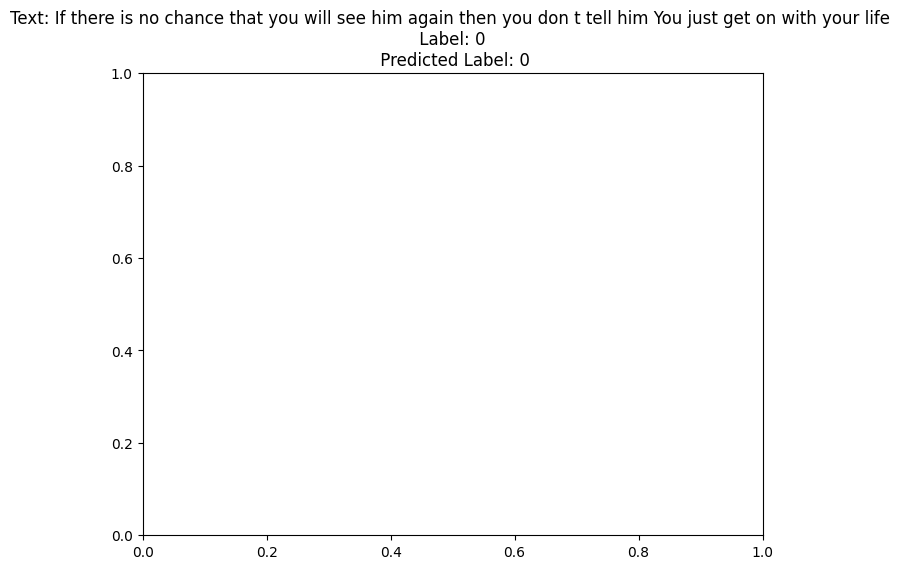

In [ ]:
fig = plt.figure()

coord = 111

In [ ]:
for filepath, header, attentions, words in zip(files, headers, all_attentions, all_words):

    for x in range(12):

        attention = attentions[x,:,0,:]
        # creating figure
        ax = plt.subplot(12, 1, x+1)
        ax.tick_params(axis='both', which='both', bottom=False, labelbottom=False, left=False, labelleft=False,)
        ax.set_ylabel(x, rotation=0, ha='right')
        ax.imshow(attention, cmap='hot', interpolation='nearest')
        ax.set_aspect(aspect=0.1)
    ax.set_xticks(np.arange(len(words)), labels=words)
    ax.tick_params(axis='x', which='both', bottom=True, labelbottom=True)
    plt.suptitle(header)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")
    plt.savefig("/content/drive/MyDrive/BertExplained/Attentions/"+filepath[:-12]+'attention_layers_heatmap_full.jpg', bbox_inches="tight")
    plt.close()
    print(filepath)

0_1_1_22_bertviz.html
1_1_1_16_bertviz.html
2_1_1_9_bertviz.html
3_1_0_14_bertviz.html
4_1_1_14_bertviz.html
5_0_0_13_bertviz.html
6_0_0_12_bertviz.html
7_1_1_15_bertviz.html
8_1_1_23_bertviz.html
9_1_1_14_bertviz.html
10_1_1_18_bertviz.html
11_1_1_19_bertviz.html
12_0_0_27_bertviz.html
13_1_1_15_bertviz.html
14_0_0_26_bertviz.html
15_0_0_13_bertviz.html
16_1_0_22_bertviz.html
17_1_1_12_bertviz.html
18_1_1_15_bertviz.html
19_0_0_12_bertviz.html
20_0_0_22_bertviz.html
21_0_0_12_bertviz.html
22_1_1_20_bertviz.html
23_0_0_19_bertviz.html
24_0_0_12_bertviz.html
25_1_1_16_bertviz.html
26_0_0_22_bertviz.html
27_0_0_22_bertviz.html
28_1_1_11_bertviz.html
29_0_0_23_bertviz.html
30_1_1_14_bertviz.html
31_0_0_14_bertviz.html
32_0_0_13_bertviz.html
33_0_0_12_bertviz.html
34_0_0_12_bertviz.html
35_0_0_11_bertviz.html
36_0_0_19_bertviz.html
37_0_0_16_bertviz.html
38_0_0_18_bertviz.html
39_1_1_21_bertviz.html
40_1_1_12_bertviz.html
41_1_1_10_bertviz.html
42_1_1_13_bertviz.html
43_0_0_12_bertviz.html

In [ ]:
zero_attention[1,:,0,:].shape

(12, 22)

Attention heads are normalised that's why by removing CLS ens SEP attentions we can obtain the heatmap of how much each head attends to words

In [ ]:
words = json.loads(pieces[4].replace(', "right_text"',''))

In [ ]:
attentions.max()

1.111109972000122

Text(0.5, 0.98, 'Label: 1 \n Predicted Label: 1')

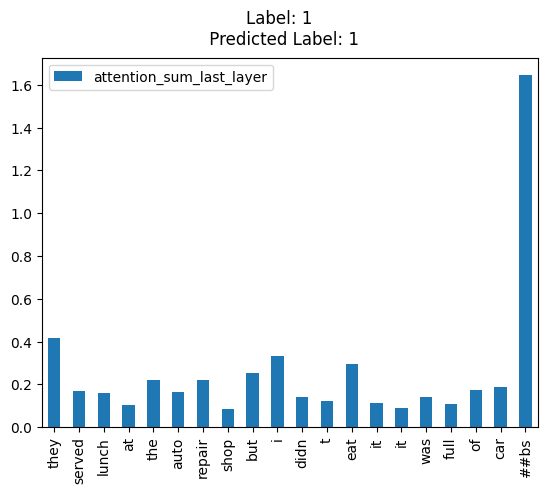

In [ ]:
#attention sum for the last layer
attention_sum_last_layer = zero_attention.sum(axis=0)[-1][0]
fig = pd.DataFrame(attention_sum_last_layer, columns=['attention_sum_last_layer'],index=words)[1:-1].plot(kind = 'bar').get_figure()

fig.suptitle(' \n '.join(lines[0].replace('<p>','').split('</p>')[1:-2]))

In [ ]:
# try to get heatmap of which attention heads are percieving more of cls attention not from SEP or CLS itself
#attention is normalised, so we get it to sum up to approximately 1. but if we get SEP and CLS tokens we will find how much actually meaningfull attention each head has

attention_sum_head = zero_attention[:,:,0,1:-1].sum(axis=2)
attention_sum_head.shape

(12, 12)

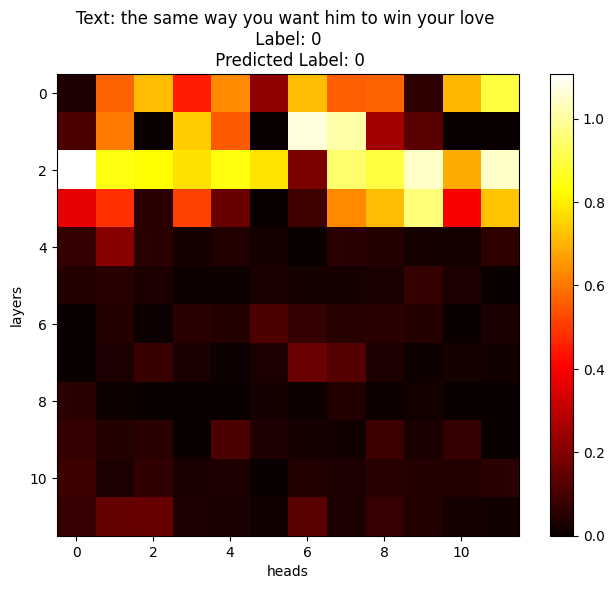

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(attention_sum_head, cmap='hot', interpolation='nearest')
plt.colorbar()
#obtaining text and label from the html
plt.title(' \n '.join(lines[0].replace('<p>','').split('</p>')[:-2]))
plt.ylabel('layers')
plt.xlabel('heads')
plt.show()

In [ ]:
attention_sum_head

array([[0.79463536, 0.53884941, 0.29024655, 0.50063702, 0.40391016,
        0.61252409, 0.39112363, 0.2608876 , 0.51615686, 0.96422383,
        0.33433892, 0.19816005],
       [0.70310859, 0.47180954, 0.1500131 , 0.19743052, 0.3669596 ,
        0.21490557, 0.03691971, 0.07846566, 0.68968183, 0.77136026,
        0.32628335, 0.5488843 ],
       [0.00277172, 0.14248341, 0.21681844, 0.24939531, 0.16221814,
        0.24426952, 0.63077012, 0.10945981, 0.13127935, 0.04325647,
        0.27385889, 0.03301655],
       [0.07592977, 0.09538174, 0.79299555, 0.05655991, 0.53514728,
        0.08953087, 0.71412568, 0.27174945, 0.08324033, 0.03884429,
        0.04869991, 0.09243524],
       [0.03492305, 0.87898576, 0.80388797, 0.24571342, 0.12329496,
        0.04097149, 0.07224786, 0.10716665, 0.08898453, 0.42486668,
        0.10517534, 0.38138429],
       [0.18098918, 0.12446516, 0.06944188, 0.50225587, 0.73873321,
        0.17390709, 0.08177874, 0.14104987, 0.35230336, 0.15402531,
        0.30305432,